In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from citipy import citipy

#import & read csv
firedata_csv="../source_data/trimmed_and_cleaner_wildland_fire.csv"
firedata_df=pd.read_csv(firedata_csv)

firedata_df.head()

,Unnamed: 0,Index,Fire ID,Cause,Latitude,Longitude,Country,State,Acres Burned,Discovery Year,Discovery Month,Discovery Day,Out Year,Out Month,Out Day
0,0,1,2020-MTLG42-000224,Human,45.785037,-104.457511,US,MT,50.6,2020,8,6,2020,8,6
1,2,3,2017-MTNWS-000878,Human,48.073946,-114.835414,US,MT,50.0,2017,10,17,2017,10,17
2,5,6,2020-MSMNF-000308,Human,31.068196,-89.069725,US,MS,1.0,2020,11,23,2020,11,23
3,6,7,2019-UTUWF-000883,Unknown,40.072836,-111.414812,US,UT,170.0,2019,10,26,2019,10,26
4,7,8,2020-MTCES-006641,Natural,44.637596,-111.575112,US,MT,0.1,2020,8,27,2020,8,27


In [3]:
# Sum Acreage by Fire Cause for all of US
cause_group = firedata_df.groupby("Cause")
cause_group_df = pd.DataFrame(cause_group["Acres Burned"].sum())
cause_group_df


,Acres Burned
Cause,
Human,8.295685e+06
Natural,2.479570e+07
Undetermined,2.751089e+06
Unknown,6.311720e+06


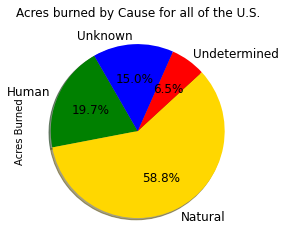

In [4]:
# Create Pie Graph for Fires burned by Cause for all of the U.S. for all years in dataset
pie_chart = cause_group_df.plot(kind="pie", y="Acres Burned",title = "Acres burned by Cause for all of the U.S.", 
                              startangle = 120, autopct='%1.1f%%', shadow=True, 
                              fontsize=12, colors=("green","gold", "red", "blue"), legend=False)

plt.show()

In [5]:
# Filter dataset for Colorado Data only

CO_firedata_df = firedata_df[firedata_df["State"].isin(["CO"])]
CO_firedata_df.head()

,Unnamed: 0,Index,Fire ID,Cause,Latitude,Longitude,Country,State,Acres Burned,Discovery Year,Discovery Month,Discovery Day,Out Year,Out Month,Out Day
14,28,30,2015-COGWD-000216,Human,39.622206,-106.904911,US,CO,0.1,2015,7,5,2015,7,5
15,29,31,2019-COMFX-000187,Human,40.239896,-108.895411,US,CO,90.0,2019,7,28,2019,7,28
19,33,35,2018-COUPD-000251,Unknown,38.145376,-108.552111,US,CO,0.1,2018,7,28,2018,7,28
22,37,41,2017-COWRD-000097,Undetermined,39.860576,-108.318411,US,CO,1.0,2017,6,12,2017,6,12
45,86,94,2015-COGRX-000446,Natural,39.921107,-106.136210,US,CO,0.2,2015,9,25,2015,9,25


In [6]:
# Sum Acreage by Fire Cause for Colorado Only
cause_group_CO = CO_firedata_df.groupby("Cause")
cause_group_CO_df = pd.DataFrame(cause_group_CO["Acres Burned"].sum())
cause_group_CO_df

,Acres Burned
Cause,
Human,440413.580
Natural,276125.385
Undetermined,24183.890
Unknown,271008.720


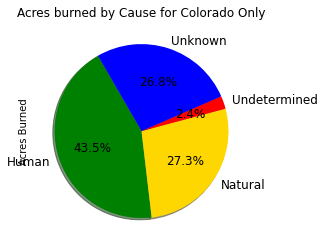

In [7]:
# Create Pie Graph for Fires burned by Cause for Colorado Only for all years in dataset
pie_chart = cause_group_CO_df.plot(kind="pie", y="Acres Burned",title = "Acres burned by Cause for Colorado Only", 
                              startangle = 120, autopct='%1.1f%%', shadow=True, 
                              fontsize=12, colors=("green","gold", "red", "blue"), legend=False)

plt.show()

In [8]:
# Filter CO Firedata for 2015-2019

CO_firedata_recent_df = CO_firedata_df[CO_firedata_df["Discovery Year"].isin(["2015", "2016", "2017", "2018", "2019"])]
CO_firedata_recent_df.head()

,Unnamed: 0,Index,Fire ID,Cause,Latitude,Longitude,Country,State,Acres Burned,Discovery Year,Discovery Month,Discovery Day,Out Year,Out Month,Out Day
14,28,30,2015-COGWD-000216,Human,39.622206,-106.904911,US,CO,0.1,2015,7,5,2015,7,5
15,29,31,2019-COMFX-000187,Human,40.239896,-108.895411,US,CO,90.0,2019,7,28,2019,7,28
19,33,35,2018-COUPD-000251,Unknown,38.145376,-108.552111,US,CO,0.1,2018,7,28,2018,7,28
22,37,41,2017-COWRD-000097,Undetermined,39.860576,-108.318411,US,CO,1.0,2017,6,12,2017,6,12
45,86,94,2015-COGRX-000446,Natural,39.921107,-106.136210,US,CO,0.2,2015,9,25,2015,9,25


In [9]:
# Count Number of Fires by Year for Colorado Only
count_fires_CO = CO_firedata_recent_df.groupby("Discovery Year")
count_fires_CO_df = pd.DataFrame(count_fires_CO["Fire ID"].count())

# Rename column for Number of Fires
count_fires_CO_renamed_df = count_fires_CO_df.rename(columns = {"Fire ID":"Number of Fires"})

count_fires_CO_renamed_df


,Number of Fires
Discovery Year,
2015,602
2016,954
2017,794
2018,1196
2019,802


In [10]:
# Convert index to column

index = count_fires_CO_renamed_df.index
index

Int64Index([2015, 2016, 2017, 2018, 2019], dtype='int64', name='Discovery Year')

Text(0.5, 1.0, 'Number of Fires by Year in Colorado')

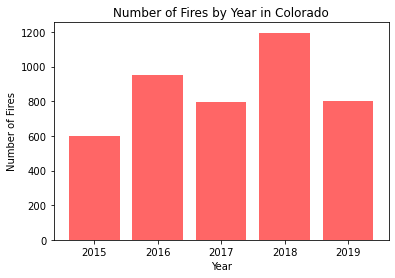

In [11]:
# Create Bar chart for Number of Fires in Colorado by year

x_axis=index
y_axis=count_fires_CO_renamed_df["Number of Fires"]
plt.bar(x_axis, y_axis, color='r', alpha=0.6, align='center')
plt.xlabel("Year")
plt.ylabel("Number of Fires")
plt.title("Number of Fires by Year in Colorado")


In [12]:
# Sum total Acres by Year for Colorado Only
sum_acres_CO = CO_firedata_recent_df.groupby("Discovery Year")
sum_acres_CO_df = pd.DataFrame(sum_acres_CO["Acres Burned"].sum())

# Rename column for Number of Fires
#count_fires_CO_renamed_df = count_fires_CO_df.rename(columns = {"Fire ID":"Number of Fires"})

sum_acres_CO_df

,Acres Burned
Discovery Year,
2015,10177.700
2016,110153.095
2017,67968.940
2018,495431.910
2019,38173.540


In [13]:
# Convert index to column

index2 = sum_acres_CO_df.index
index2

Int64Index([2015, 2016, 2017, 2018, 2019], dtype='int64', name='Discovery Year')

Text(0.5, 1.0, 'Total Acres Burned by Year in Colorado')

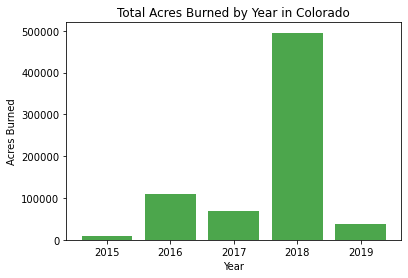

In [14]:
# Create Bar chart for Total Acres burned in Colorado by year

x_axis=index2
y_axis=sum_acres_CO_df["Acres Burned"]
plt.bar(x_axis, y_axis, color='g', alpha=0.7, align='center')
plt.xlabel("Year")
plt.ylabel("Acres Burned")
plt.title("Total Acres Burned by Year in Colorado")


In [15]:
# Average Acres by fire by Year for Colorado Only
avg_acres_CO = CO_firedata_recent_df.groupby("Discovery Year")
avg_acres_CO_df = pd.DataFrame(avg_acres_CO["Acres Burned"].mean())
avg_acres_CO_df 

,Acres Burned
Discovery Year,
2015,16.906478
2016,115.464460
2017,85.603199
2018,414.240727
2019,47.597930


In [18]:
# Filter US Firedata for 2015-2019

US_firedata_recent_df = firedata_df[firedata_df["Discovery Year"].isin(["2015", "2016", "2017", "2018", "2019"])]
US_firedata_recent_df.head()

,Unnamed: 0,Index,Fire ID,Cause,Latitude,Longitude,Country,State,Acres Burned,Discovery Year,Discovery Month,Discovery Day,Out Year,Out Month,Out Day
1,2,3,2017-MTNWS-000878,Human,48.073946,-114.835414,US,MT,50.0,2017,10,17,2017,10,17
3,6,7,2019-UTUWF-000883,Unknown,40.072836,-111.414812,US,UT,170.0,2019,10,26,2019,10,26
6,11,13,2019-AZA5S-001664,Natural,34.403275,-112.439311,US,AZ,0.1,2019,9,5,2019,9,5
8,16,18,2016-UTSWS-000203,Natural,37.228126,-113.206312,US,UT,0.1,2016,6,13,2016,6,13
9,19,21,2019-MSMNF-050003,Human,31.558896,-88.749725,US,MS,5.0,2019,6,3,2019,6,3


In [19]:
# Count Number of Fires by Year for all of U.S.
count_fires_US = US_firedata_recent_df.groupby("Discovery Year")
count_fires_US_df = pd.DataFrame(count_fires_US["Fire ID"].count())

# Rename column for Number of Fires
count_fires_US_renamed_df = count_fires_US_df.rename(columns = {"Fire ID":"Number of Fires"})

count_fires_US_renamed_df

,Number of Fires
Discovery Year,
2015,11844
2016,12869
2017,15675
2018,14804
2019,14309


In [20]:
# Convert index to column

index = count_fires_US_renamed_df.index
index

Int64Index([2015, 2016, 2017, 2018, 2019], dtype='int64', name='Discovery Year')

Text(0.5, 1.0, 'Number of Fires by Year in U.S. 2015-2019')

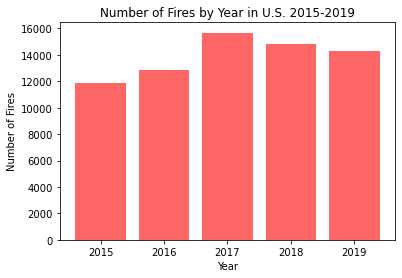

In [44]:
# Create Bar chart for Number of Fires in US by year

x_axis=index
y_axis=count_fires_US_renamed_df["Number of Fires"]
plt.bar(x_axis, y_axis, color='r', alpha=0.6, align='center')
plt.xlabel("Year")
plt.ylabel("Number of Fires")
plt.title("Number of Fires by Year in U.S. 2015-2019")


In [28]:
# Sum total Acres by Year for all of U.S.
sum_acres_US = US_firedata_recent_df.groupby("Discovery Year")
sum_acres_US_df = pd.DataFrame(sum_acres_US["Acres Burned"].sum())

# Rename column for Number of Fires
#count_fires_CO_renamed_df = count_fires_CO_df.rename(columns = {"Fire ID":"Number of Fires"})

sum_acres_US_df

,Acres Burned
Discovery Year,
2015,9.374966e+06
2016,3.765966e+06
2017,7.015263e+06
2018,7.193967e+06
2019,4.610154e+06


In [29]:
# Convert index to column

index2 = sum_acres_US_df.index
index2

Int64Index([2015, 2016, 2017, 2018, 2019], dtype='int64', name='Discovery Year')

Text(0.5, 1.0, 'Total Acres Burned by Year in U.S. 2015-2019')

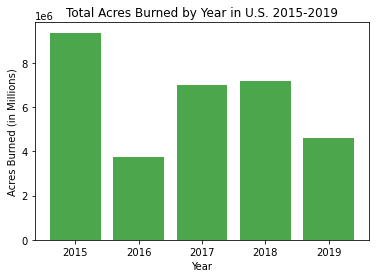

In [47]:
# Create Bar chart for Total Acres burned in U.S. by year

x_axis=index2
y_axis=sum_acres_US_df["Acres Burned"]
plt.bar(x_axis, y_axis, color='g', alpha=0.7, align='center')
plt.xlabel("Year")
plt.ylabel("Acres Burned (in Millions)")
plt.title("Total Acres Burned by Year in U.S. 2015-2019")


In [33]:
# Sum Acreage by Fire Cause for all of US in 2015-2019
cause_group_US = US_firedata_recent_df.groupby("Cause")
cause_group_US_df = pd.DataFrame(cause_group_US["Acres Burned"].sum())
cause_group_US_df

,Acres Burned
Cause,
Human,6.480892e+06
Natural,2.034090e+07
Undetermined,2.456620e+06
Unknown,2.681903e+06


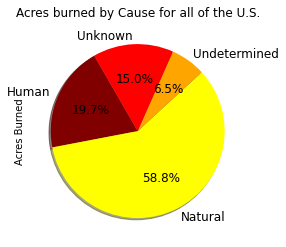

In [39]:
# Create Pie Graph for Fires burned by Cause for all of the U.S. for 2015-2019
pie_chart = cause_group_df.plot(kind="pie", y="Acres Burned",title = "Acres burned by Cause for all of the U.S.", 
                              startangle = 120, autopct='%1.1f%%', shadow=True, 
                              fontsize=12, colors=("maroon","yellow", "orange", "red"), legend=False)

plt.show()

In [35]:
# Sum Acreage by Fire Cause for Colorado Only
cause_group_CO = CO_firedata_recent_df.groupby("Cause")
cause_group_CO_df = pd.DataFrame(cause_group_CO["Acres Burned"].sum())
cause_group_CO_df

,Acres Burned
Cause,
Human,428302.780
Natural,216261.625
Undetermined,4608.790
Unknown,72731.990


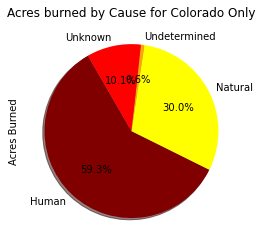

In [43]:
# Create Pie Graph for Fires burned by Cause for Colorado for 2015-2019
pie_chart = cause_group_CO_df.plot(kind="pie", y="Acres Burned",title = "Acres burned by Cause for Colorado Only", 
                              startangle = 120, autopct='%1.1f%%', shadow=True, 
                              fontsize=10, colors=("maroon","yellow", "orange", "red"), legend=False)

plt.show()